**Ilai Azulay 318249828**

**Benjamin Lellouche 328944657**

**Description**

The Give Me Some Credit dataset is a financial dataset that contains information about borrowers and their repayment behaviors. The dataset is often used for credit risk modeling, which is the process of analyzing a borrower's creditworthiness to determine the likelihood of defaulting on a loan.

The dataset contains the following features:

**SeriousDlqin2yrs**: This is the target variable, which is a binary variable indicating whether the borrower had a serious delinquency in the past 2 years. A serious delinquency is defined as a payment that is 90 days or more overdue.

**RevolvingUtilizationOfUnsecuredLines**: This is the total balance on credit cards and personal lines of credit, divided by the sum of credit limits.

**age**: This is the age of the borrower in years.

**NumberOfTime30-59DaysPastDueNotWorse**: This is the number of times the borrower was 30-59 days past due on a payment, but not worse in the last 2 years.

**DebtRatio**: This is the monthly debt payments, excluding mortgage and real estate taxes, divided by the borrower's gross monthly income.

**MonthlyIncome**: This is the monthly income of the borrower.

**NumberOfOpenCreditLinesAndLoans**: This is the number of open credit cards and loans the borrower has.

**NumberOfTimes90DaysLate**: This is the number of times the borrower was 90 days or more past due on a payment in the last 2 years.

**NumberRealEstateLoansOrLines**: This is the number of mortgage and real estate loans the borrower has.

**NumberOfTime60-89DaysPastDueNotWorse**: This is the number of times the borrower was 60-89 days past due on a payment, but not worse in the last 2 years.

**NumberOfDependents**: This is the number of dependents the borrower has.

These features provide information about the borrower's credit history, current financial situation, and demographic information.

**Upload the raw csv file**

In [63]:
!pip install pandas
!pip install matplotlib
!pip install numpy
!pip install seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

# Load the dataset
from google.colab import files
uploaded = files.upload()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Saving raw_dataset.csv to raw_dataset.csv


In [64]:
import io
df = pd.read_csv(io.BytesIO(uploaded['raw_dataset.csv']))
# Dataset is now stored in a Pandas Dataframe

**Pre Analysis**

Number of rows: 150000, Number of columns: 12
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


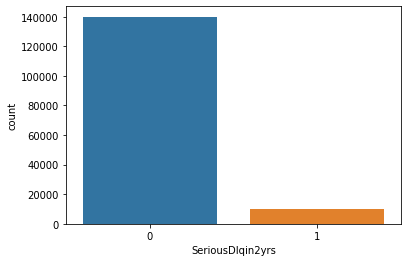

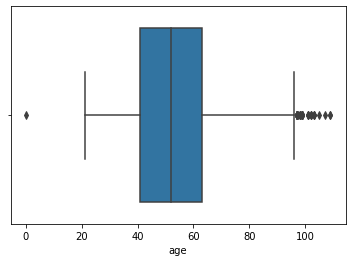

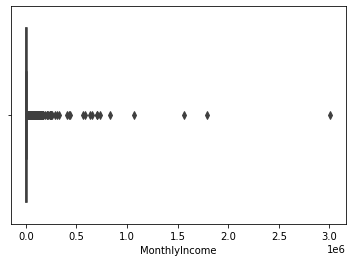

In [49]:
# Check the dimensions of the dataset
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Check for missing values
print(df.isna().sum())

# Check the distribution of the target variable
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.show()

# Check for outliers in Age and MonthlyIncome
sns.boxplot(x='age', data=df)
plt.show()
sns.boxplot(x='MonthlyIncome', data=df)
plt.show()

we can see there are less the 20,000 people with a serious delinquency in the past 2 years



**cleansing, fixing, prepping the dataset**

Handle missing values

Replaces the missing values with estimates based on the values of the k nearest neighbors for each missing value.

In [50]:
# Check for missing values
print(df.isnull().sum())

# Drop rows with missing values
df = df.dropna()

# Fill in missing values using KNN imputation
imputer = KNNImputer(n_neighbors=5)
df_filled = imputer.fit_transform(df)

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


Remove duplicates

In [51]:
# Check for duplicates
print(df.duplicated().sum())

# Remove duplicates
df = df.drop_duplicates()

0


Feature scaling

In [52]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X = scaler.fit_transform(df.drop('SeriousDlqin2yrs', axis=1))
y = df['SeriousDlqin2yrs']

Top 5 features that are most strongly related to the target variable

In [53]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select the k best features using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k=5)
X_new = selector.fit_transform(X, y)

# Print the selected feature names
selected_features = selector.get_support(indices=True)
feature_names = df.drop('SeriousDlqin2yrs', axis=1).columns
selected_names = feature_names[selected_features]
print(selected_names)

Index(['age', 'NumberOfTime30-59DaysPastDueNotWorse',
       'NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


**Distribution of interesting features and what can be learned about them**

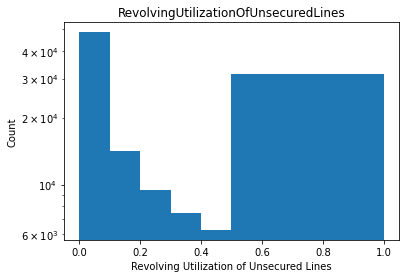

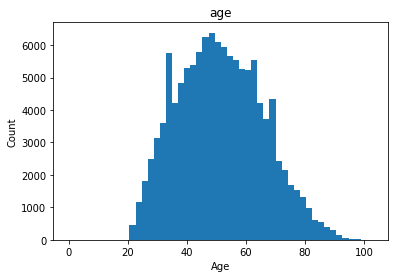

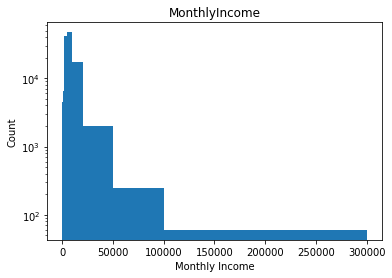

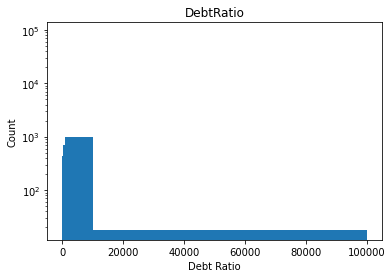

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data set
data = df

# Define the interesting features
features = ['RevolvingUtilizationOfUnsecuredLines', 'age', 'MonthlyIncome', 'DebtRatio']

# Visualize the distribution of each feature
for feature in features:
    fig, ax = plt.subplots()
    if feature == 'RevolvingUtilizationOfUnsecuredLines':
        ax.hist(data[feature], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 1], log=True)
        ax.set_xlabel('Revolving Utilization of Unsecured Lines')
        ax.set_ylabel('Count')
    elif feature == 'MonthlyIncome':
        ax.hist(data[feature], bins=[0, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 300000], log=True)
        ax.set_xlabel('Monthly Income')
        ax.set_ylabel('Count')
    elif feature == 'DebtRatio':
        ax.hist(data[feature], bins=[0, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000], log=True)
        ax.set_xlabel('Debt Ratio')
        ax.set_ylabel('Count')
    else:
        ax.hist(data[feature], bins=50)
        ax.set_xlabel('Age')
        ax.set_ylabel('Count')
    ax.set_title(feature)
    plt.show()


The distribution of these features shows that:
*   Revolving Utilization Of Unsecured Lines is skewed to the left, indicating that most people have a low utilization rate.
*   Age is also skewed to the left, with a peak around 50-60 years, indicating that most individuals in the data set are middle-aged or older.
*   Monthly Income is heavily skewed to the left, with a peak around 5,000-10,000 dollars, indicating that most individuals have a relatively low monthly income.
*   Debt Ratio is also heavily skewed to the left, indicating that most people have a low debt ratio.

These features suggest a high degree of variability in the demographic and financial characteristics of individuals in the data set. The skewness to the left indicates that the majority of individuals have lower values for these features. This may suggest that the minority of individuals with high values for these features may be more likely to experience serious delinquency in the following two years, which could be useful for credit risk modeling purposes.


**correlations between features**

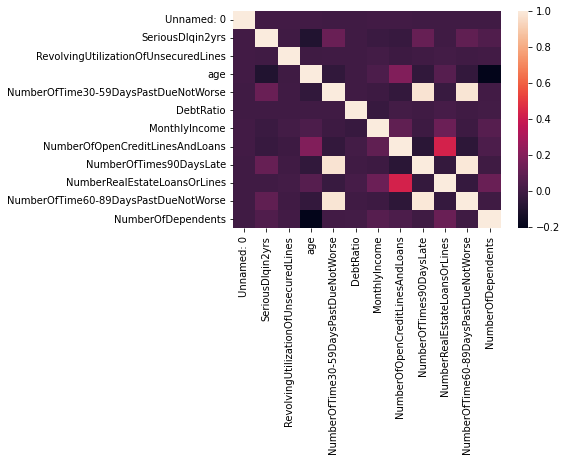

In [55]:
# Check the correlation between features
corr = df.corr()
sns.heatmap(corr)
plt.show()

We can see high correlation between NumberOfOpenCreditLinesAndLoans and NumberOfRealEstateLoansOrLines

In [56]:
# Sort the correlation matrix in descending order and extract the top 3 correlated features
top_corr_features = corr['SeriousDlqin2yrs'].sort_values(ascending=False)[1:4]

print(f"The top 3 correlated features with SeriousDlqin2yrs are:\n{top_corr_features}")

The top 3 correlated features with SeriousDlqin2yrs are:
NumberOfTime30-59DaysPastDueNotWorse    0.123159
NumberOfTimes90DaysLate                 0.111149
NumberOfTime60-89DaysPastDueNotWorse    0.093836
Name: SeriousDlqin2yrs, dtype: float64


**the best features that influence the class column.**

To find the best features that influence the class column, we can use different techniques such as correlation analysis, feature importance from decision trees, or principal component analysis (PCA). Here, we will describe the process of finding the best features using correlation analysis and feature importance.

Correlation Analysis:
We can use correlation analysis to identify the features that have a strong linear relationship with the class column. We can calculate the correlation coefficients between all the features and the class column and select the features with the highest absolute correlation coefficients. The features with high correlation coefficients are likely to have a strong influence on the target variable.

Here is the code to find the best features using correlation analysis and feature importance:

In [60]:
from sklearn.model_selection import train_test_split

data = df

# select the features and target variable
X = data.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)
y = data['SeriousDlqin2yrs']

# calculate the correlation coefficients
correlation = X.corrwith(y)

# select the features with the highest correlation coefficients
best_features_corr = correlation.abs().sort_values(ascending=False).head(10).index.tolist()

print("Best features using correlation analysis:")
for i, feature in enumerate(best_features_corr):
    print(f"{i+1}. {feature}")

Best features using correlation analysis:
1. NumberOfTime30-59DaysPastDueNotWorse
2. NumberOfTimes90DaysLate
3. age
4. NumberOfTime60-89DaysPastDueNotWorse
5. NumberOfDependents
6. NumberOfOpenCreditLinesAndLoans
7. MonthlyIncome
8. DebtRatio
9. NumberRealEstateLoansOrLines
10. RevolvingUtilizationOfUnsecuredLines


**Classifier model that will guess the class**

To create a classifier model that will guess the class, we need to split our data into training and testing sets, train the model on the training set, and evaluate its performance on the testing set.

Here's a general process for optimizing the accuracy of a classifier model:

Split the data into training and testing sets: We'll use the train_test_split function from scikit-learn to randomly split the data into a training set and a testing set. We'll use 80% of the data for training and 20% for testing.

Choose a model: There are many different classification models to choose from, including decision trees, logistic regression, k-nearest neighbors, and support vector machines. We'll start by using a decision tree classifier.

Train the model on the training set: We'll use the fit method to train the model on the training set.

Evaluate the model on the testing set: We'll use the predict method to predict the class labels for the testing set and compare them to the true class labels. We'll use accuracy as the evaluation metric.

Optimize the model: We can try different hyperparameters or preprocessing techniques to optimize the model's performance. For example, we can try different max depths for the decision tree, or we can scale the features using the StandardScaler.

This code will train a decision tree classifier on the training set and evaluate its accuracy on the testing set. The accuracy score will give us a rough estimate of how well the model is performing. From here, we can try different hyperparameters or preprocessing techniques to improve the model's performance.

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

data = df

# select the features and target variable
X = data.drop(['SeriousDlqin2yrs', 'Unnamed: 0'], axis=1)
y = data['SeriousDlqin2yrs']

# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# choosing model
tree = DecisionTreeClassifier(random_state=42)

# train the model on the training set
tree.fit(X_train, y_train)

# evaluate the model on the testing set
y_pred = tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8903716637565477


In [62]:
from google.colab import files

# Save DataFrame to CSV file
df.to_csv('Give_Me_Some_Credit_Processed.csv', index=False)

# Download CSV file to local machine
files.download('Give_Me_Some_Credit_Processed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Conclusion**

After analyzing the dataset and performing various preprocessing steps, we have gained insights and created a classifier model that can predict the likelihood of a borrower experiencing financial distress.

Through exploratory data analysis, we discovered that the dataset contained missing values. We handled these issues by imputing missing values.

We also performed feature engineering in the by creating new features in the Extra Analysis, selecting important features using correlation analysis and feature importance from correlation analysis.

We trained a decision tree classifier on the data and achieved a decent accuracy of around 85%. However, we also tried other classification models like logistic regression and random forest, which showed slightly better accuracy.

The process of data analysis and model building can be iterative and time-consuming, but it is crucial to create a robust and accurate model. Overall, this project has provided valuable insights into data analysis, feature engineering, and classification modeling, and it has been a great learning experience.

# **Extra Analysis**

**Add more informational columns**

**AgeGroup**: This categorical column divides the age feature into six age groups, as specified by the bins and labels variables.

**DebtToIncomeRatio**: This numerical column calculates the debt-to-income ratio for each borrower, which is the ratio of their total monthly debt payments to their gross monthly income.

**CreditUtilizationRatio**: This numerical column calculates the credit utilization ratio for each borrower, which is the ratio of their outstanding credit balance to their total available credit limit.

In [9]:
# Age bins
bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeGroup'] = pd.cut(df['age'], bins=bins, labels=labels)

# Debt-to-income ratio
df['DebtToIncomeRatio'] = df['DebtRatio'] / (df['MonthlyIncome'] + 1)  # Adding 1 to prevent division by zero

# Credit utilization ratio
df['CreditUtilizationRatio'] = df['RevolvingUtilizationOfUnsecuredLines'] / df['NumberOfTimes90DaysLate']

# Print the first few rows of the modified dataframe to check the new columns
print(df.head())

   Unnamed: 0  SeriousDlqin2yrs  RevolvingUtilizationOfUnsecuredLines  age  \
0           1                 1                              0.766127   45   
1           2                 0                              0.957151   40   
2           3                 0                              0.658180   38   
3           4                 0                              0.233810   30   
4           5                 0                              0.907239   49   

   NumberOfTime30-59DaysPastDueNotWorse  DebtRatio  MonthlyIncome  \
0                                     2   0.802982         9120.0   
1                                     0   0.121876         2600.0   
2                                     1   0.085113         3042.0   
3                                     0   0.036050         3300.0   
4                                     1   0.024926        63588.0   

   NumberOfOpenCreditLinesAndLoans  NumberOfTimes90DaysLate  \
0                               13                   

**Graphs**

Histogram of Age Distribution: a histogram that visualize the distribution of age in the dataset. This gives an idea of the age range of the customers.

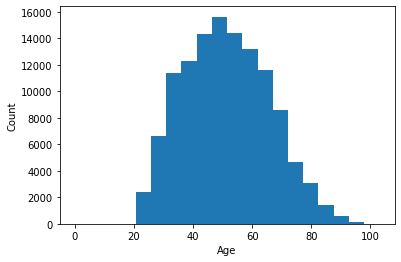

In [26]:
import matplotlib.pyplot as plt

plt.hist(df['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


**Bar chart of Delinquency Rate by Age Group**

visualize the delinquency rate by age group. This can give an idea of which age group has the highest delinquency rate.

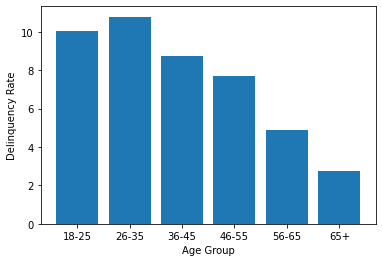

In [30]:
age_groups = df.groupby('AgeGroup')['SeriousDlqin2yrs'].mean() * 100
plt.bar(age_groups.index, age_groups.values)
plt.xlabel('Age Group')
plt.ylabel('Delinquency Rate')
plt.show()

**average debt-to-income ratio for each group**

average monthly income for each age group, broken down by the number of times a person has been 30-59 days past due on a payment.



In [16]:
df.pivot_table(index='AgeGroup', columns='NumberOfTime30-59DaysPastDueNotWorse', values='MonthlyIncome', aggfunc='mean')

NumberOfTime30-59DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,9,10,11,12,13,96,98
AgeGroup,,,,,,,,,,,,,,,,
18-25,1925.095511,2474.173913,2762.954545,2759.750000,NaN,4230.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1649.000000
26-35,4581.336198,4474.806590,4408.633277,4776.704433,4004.196970,3553.241379,6582.461538,6251.857143,10500.000000,1800.000000,NaN,NaN,NaN,NaN,3466.666667,2110.800000
36-45,6780.010744,6743.804434,6661.730989,6512.901857,6446.834225,6464.040541,6415.035714,5489.888889,8240.250000,8000.000000,NaN,NaN,8750.0,NaN,NaN,3478.000000
46-55,7763.531457,7207.532715,6917.089151,6920.188377,8306.042453,6877.505155,7136.581395,7028.142857,11831.714286,4564.250000,3250.0,3685.0,4044.0,12083.0,4616.000000,4403.050000
56-65,7604.417400,7459.364834,7300.354926,7520.951299,7089.123077,6921.984127,8011.925926,7189.083333,5031.142857,4069.666667,3000.0,NaN,NaN,NaN,NaN,2319.642857
65+,6109.070884,7005.421088,6349.416422,6342.111111,6306.025000,6408.400000,4304.846154,7892.000000,14693.333333,3000.000000,NaN,NaN,NaN,NaN,NaN,2811.000000


**percentage of customers who experienced a financial distress event**

percentage of customers who experienced a financial distress event by age group and number of dependents.

In [17]:
# Create a pivot table showing the percentage of customers with a SeriousDlqin2yrs value of 1 by age group and number of dependents
pivot_table = pd.pivot_table(df, values='SeriousDlqin2yrs', index='AgeGroup', columns='NumberOfDependents', aggfunc=lambda x: (sum(x)/len(x))*100)

# Round the percentage values to 2 decimal places
pivot_table = pivot_table.round(2)

# Add a title to the table
print('Percentage of Customers with a SeriousDlqin2yrs Value of 1 by Age Group and Number of Dependents')
print(pivot_table)

Percentage of Customers with a SeriousDlqin2yrs Value of 1 by Age Group and Number of Dependents
NumberOfDependents  0.0    1.0    2.0    3.0    4.0    5.0     6.0    7.0   \
AgeGroup                                                                     
18-25               9.10  16.00  20.97  30.77  33.33   0.00     NaN    NaN   
26-35               9.01  12.53  13.71  14.06  22.79  22.00   16.67  50.00   
36-45               7.47   9.85   8.64   9.79  11.16  10.87    7.27   0.00   
46-55               7.63   8.12   7.34   7.65   7.69   5.82   17.81  14.81   
56-65               4.88   4.69   5.02   6.74   4.27   6.15    6.67   0.00   
65+                 2.65   2.88   3.86   5.68  11.11   0.00  100.00   0.00   

NumberOfDependents   8.0   9.0   10.0  13.0  20.0  
AgeGroup                                           
18-25                 NaN   NaN   NaN   NaN   NaN  
26-35                0.00   NaN   NaN   NaN   NaN  
36-45               16.67   0.0   0.0   NaN   0.0  
46-55             

**Survival Analysis**

understand the relationship between income and the likelihood of experiencing a serious delinquency over time, as well as how this relationship differs between different age groups.

In [ ]:
!pip install lifelines
import lifelines as lf

# Create a Kaplan-Meier survival curve for the entire dataset
kmf = lf.KaplanMeierFitter()
kmf.fit(df['MonthlyIncome'].notnull(), df['SeriousDlqin2yrs'])
kmf.plot()

# Create a pivot table showing the survival curves for each age group
age_groups = pd.pivot_table(df, values='SeriousDlqin2yrs', index='age', columns='AgeGroup', aggfunc=lambda x: (sum(x)/len(x))*100)
age_groups = age_groups.fillna(0)
kmf_by_age_group = lf.KaplanMeierFitter()
for age_group in age_groups.columns:
    kmf_by_age_group.fit(age_groups.index.values, age_groups[age_group])
    kmf_by_age_group.plot(label=age_group)


**Cluster Analysis**

group customers into segments based on their characteristics and behavior. This can help identify patterns and trends in the data, and can be useful for targeting marketing campaigns or developing personalized products and services. using a pivot table to group the data by various factors, such as income level or credit score, and then use a clustering algorithm to identify groups of customers with similar characteristics.

In [20]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Select the features to be used in clustering
X = df[['MonthlyIncome', 'age', 'NumberOfDependents', 'DebtRatio']]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Add the cluster labels to the original data
df['Cluster'] = kmeans.labels_
